<figure>
<IMG SRC="../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 6

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

<IPython.core.display.Javascript object>


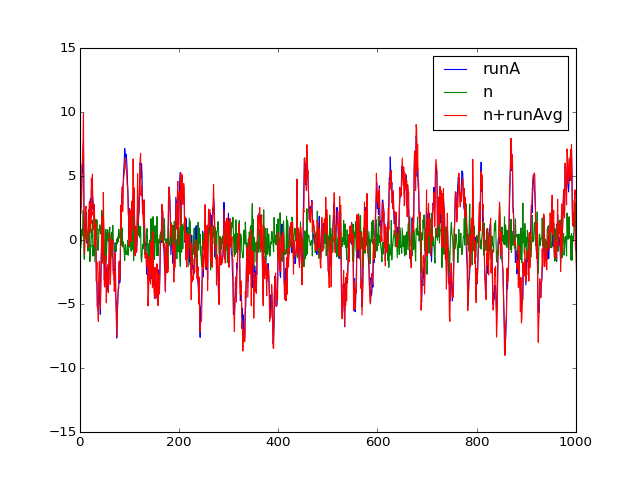

(1, 1000)

In [26]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib nbagg

N=10000
t=np.arange(0.,N,1.)
x=np.random.randn(N)
n=np.random.randn(N)

win=np.ones(10)
runAvg=np.convolve(x, win, 'same')
y=n+runAvg

fig, ax=plt.subplots(1,1)
ax.plot(t,runAvg,label='runA')
ax.plot(t,n,label='n')
ax.plot(t,y,label='n+runAvg')
ax.legend(loc=0)
ax.set_xlim(1,1000)

<IPython.core.display.Javascript object>


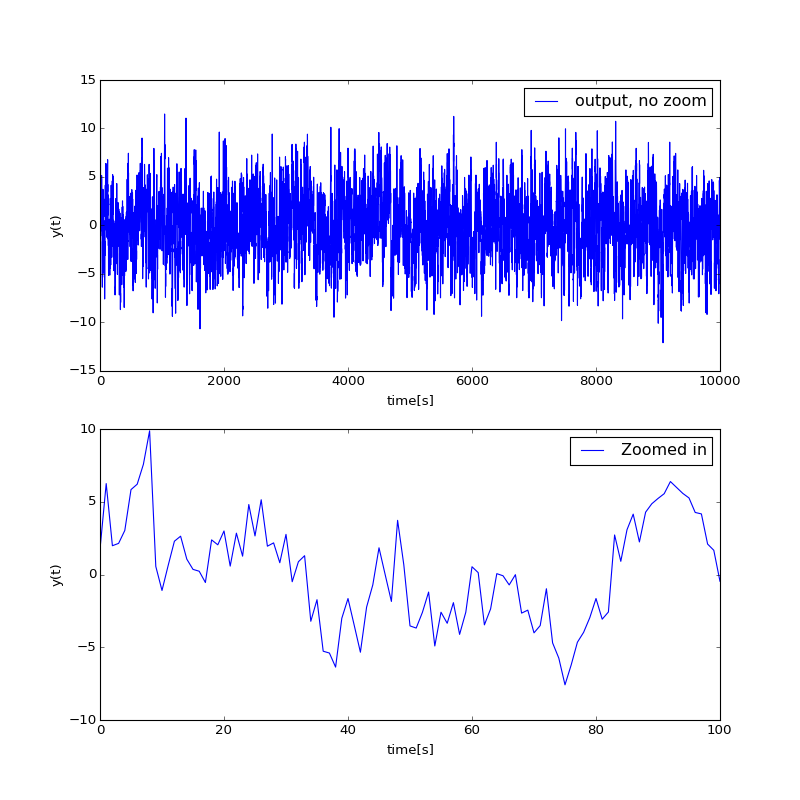

In [27]:
fig, ax=plt.subplots(2,1, figsize=(10,10))
ax[0].plot(t,y, label='output, no zoom')
ax[0].legend(loc=0)
ax[0].set_xlabel('time[s]')
ax[0].set_ylabel('y(t)')

ax[1].plot(t,y, label='Zoomed in')
ax[1].set_xlim(0,100)
ax[1].set_ylim(-10, 10)
ax[1].legend(loc=0)
ax[1].set_xlabel('time[s]')
ax[1].set_ylabel('y(t)')

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

<IPython.core.display.Javascript object>


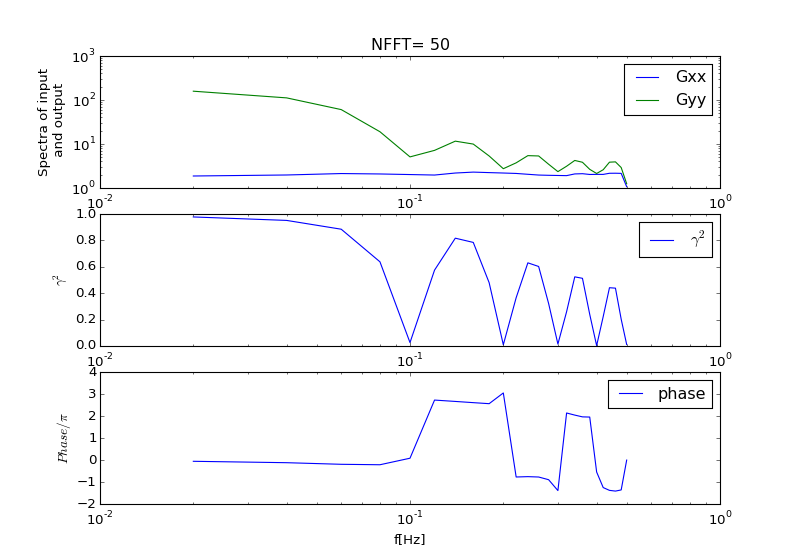

In [28]:
Gxx,fx= mlab.psd(x,NFFT=50, Fs=1., window=mlab.window_hanning, noverlap=25)
Gyy,fy= mlab.psd(y,NFFT=50, Fs=1., window=mlab.window_hanning, noverlap=25)
cFx,f= mlab.csd(x,y,NFFT=50,Fs=1.,window=mlab.window_hanning, noverlap=25)
gamma=abs(cFx)**2/Gxx/Gyy
ang=np.arctan2(np.imag(cFx), np.real(cFx))
ang=ang/np.pi

phase=np.angle(cFx)
fig, ax=plt.subplots(3,1,figsize=(10,7))
ax[0].loglog(f,Gxx,label='Gxx')
ax[0].loglog(f,Gyy, label='Gyy')
ax[0].set_xlabel('Freq [Hz]')
ax[0].set_ylabel('Spectra of input\n and output')
ax[0].legend(loc=0)
ax[0].set_title('NFFT= 50')

ax[1].semilogx(f,gamma,label='$\gamma^2$')
ax[1].set_ylabel('$\gamma^2$')
ax[1].set_xlabel('f[Hz]')
ax[1].legend(loc=0)

ax[2].semilogx(f,phase,label='phase')
ax[2].set_ylabel('$Phase/\pi$')
ax[2].set_xlabel('f[Hz]')
ax[2].legend(loc=0)

The coherence squared oscillates up and down, where the input and output are better corellated to not correlated at all, but also has a gradual decreasing in the coherence. Thus, as for smaller frequencies, the running average differs a lot more from the input x than for higher. At the highest frequency, they are quite correlated. 

The Phase is also interesting. At lower frequencies, the input and output are out of phase in a somewhat oscillating way too. 

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

<IPython.core.display.Javascript object>


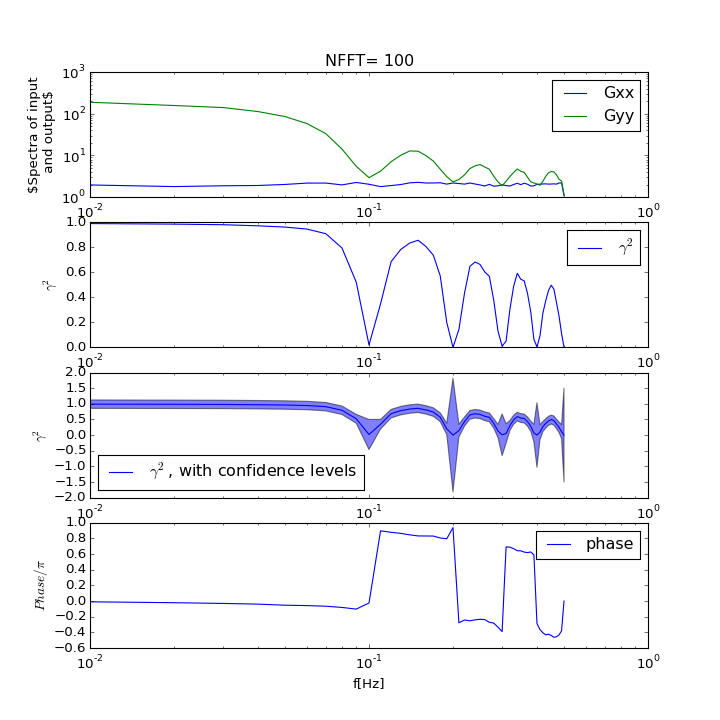

<IPython.core.display.Javascript object>


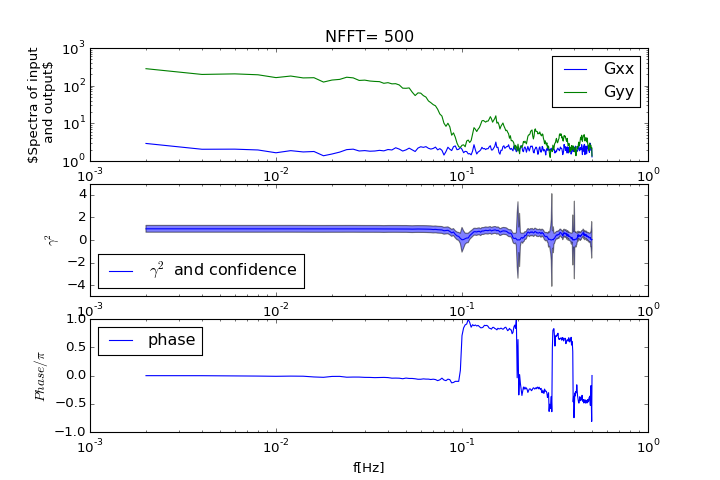

<IPython.core.display.Javascript object>


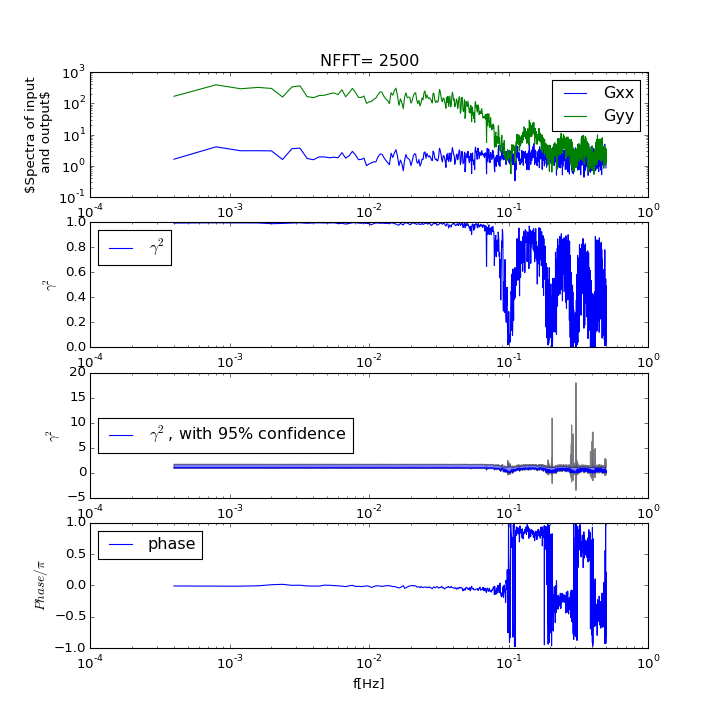

In [60]:
Gxx,fx= mlab.psd(x,NFFT=100, Fs=1., window=mlab.window_hanning, noverlap=50)
Gyy,fy= mlab.psd(y,NFFT=100, Fs=1., window=mlab.window_hanning, noverlap=50)
cFx,f= mlab.csd(x,y,NFFT=100,Fs=1.,window=mlab.window_hanning, noverlap=50)
gamma=abs(cFx)**2/Gxx/Gyy
ang=np.arctan2(np.imag(cFx), np.real(cFx))
ang=ang/np.pi

nd1=N/100
upper1=gamma+(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd1)
lower1=gamma-(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd1)

fig, ax=plt.subplots(4,1,figsize=(9,9))
ax[0].loglog(f,Gxx,label='Gxx')
ax[0].loglog(f,Gyy, label='Gyy')
ax[0].set_xlabel('Freq [Hz]')
ax[0].set_ylabel('$Spectra of input\n and output$')
ax[0].legend(loc=0)
ax[0].set_title('NFFT= 100')

ax[1].semilogx(f,gamma,label='$\gamma^2$')
ax[1].set_ylabel('$\gamma^2$')
ax[1].set_xlabel('f[Hz]')
ax[1].legend(loc=0)

ax[2].semilogx(f,gamma,label='$\gamma^2$, with confidence levels')
ax[2].fill_between(f,upper1, lower1, alpha=.5)
ax[2].set_ylabel('$\gamma^2$')
ax[2].set_xlabel('f[Hz]')
ax[2].legend(loc=3)

ax[3].semilogx(f,ang,label='phase')
ax[3].set_ylabel('$Phase/\pi$')
ax[3].set_xlabel('f[Hz]')
ax[3].legend(loc=0)


Gxx,fx= mlab.psd(x,NFFT=500, Fs=1., window=mlab.window_hanning, noverlap=250)
Gyy,fy= mlab.psd(y,NFFT=500, Fs=1., window=mlab.window_hanning, noverlap=250)
cFx,f= mlab.csd(x,y,NFFT=500,Fs=1.,window=mlab.window_hanning, noverlap=250)
gamma=abs(cFx)**2/Gxx/Gyy
ang=np.arctan2(np.imag(cFx), np.real(cFx))
ang=ang/np.pi
nd2=N/500
upper2=gamma+(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd2)
lower2=gamma-(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd2)

fig, ax=plt.subplots(3,1,figsize=(9,6))
ax[0].loglog(f,Gxx,label='Gxx')
ax[0].loglog(f,Gyy, label='Gyy')
ax[0].set_xlabel('Freq [Hz]')
ax[0].set_ylabel('$Spectra of input\n and output$')
ax[0].legend(loc=0)
ax[0].set_title('NFFT= 500')

ax[1].semilogx(f,gamma,label='$\gamma^2$ and confidence')
ax[1].fill_between(f,upper2, lower2, alpha=.5)
ax[1].set_ylabel('$\gamma^2$')
ax[1].set_xlabel('f[Hz]')
ax[1].legend(loc=3)

ax[2].semilogx(f,ang,label='phase')
ax[2].set_ylabel('$Phase/\pi$')
ax[2].set_xlabel('f[Hz]')
ax[2].legend(loc=0)


Gxx,fx= mlab.psd(x,NFFT=2500, Fs=1., window=mlab.window_hanning, noverlap=1250)
Gyy,fy= mlab.psd(y,NFFT=2500, Fs=1., window=mlab.window_hanning, noverlap=1250)
cFx,f= mlab.csd(x,y,NFFT=2500,Fs=1.,window=mlab.window_hanning, noverlap=1250)
gamma=abs(cFx)**2/Gxx/Gyy
ang=np.arctan2(np.imag(cFx), np.real(cFx))
ang=ang/np.pi
nd3=N/2500
upper3=gamma+(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd3)
lower3=gamma-(np.sqrt(2.)*(1+gamma))/np.abs(np.sqrt(gamma))/np.sqrt(nd1)

fig, ax=plt.subplots(4,1,figsize=(9,9))
ax[0].loglog(f,Gxx,label='Gxx')
ax[0].loglog(f,Gyy, label='Gyy')
ax[0].set_xlabel('Freq [Hz]')
ax[0].set_ylabel('$Spectra of input\n and output$')
ax[0].legend(loc=0)
ax[0].set_title('NFFT= 2500')

ax[1].semilogx(f,gamma,label='$\gamma^2$')
ax[1].set_ylabel('$\gamma^2$')
ax[1].set_xlabel('f[Hz]')
ax[1].legend(loc=0)

ax[2].semilogx(f,gamma,label='$\gamma^2$, with 95% confidence')
ax[2].fill_between(f,upper3, lower3, alpha=.5)
ax[2].set_ylabel('$\gamma^2$')
ax[2].set_xlabel('f[Hz]')
ax[2].legend(loc=6)

ax[3].semilogx(f,ang,label='phase')
ax[3].set_ylabel('$Phase/\pi$')
ax[3].set_xlabel('f[Hz]')
ax[3].legend(loc=0)

As the windows get larger, the two spectra, and thus their coherence squared and relative phase, begin to have a lot more fluctuation. The 95% confidence intervals grow much larger, most likely becuase of the fluctuation. For NFFT= 100, the interval goes up to 4,  but for NFFT=2500, the interval goes up to almost 40!
I plotted some of the $\gamma^2$ graphs twice, just to see them up close before I added the confidence levels. 
Increasing the size of the blocks really did not imporve the phase and coherence reading, but just added more noise to the spectra and thus the other plots. 


## Q2: Shear turbulence data

In [45]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')

284.3776



<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

<IPython.core.display.Javascript object>


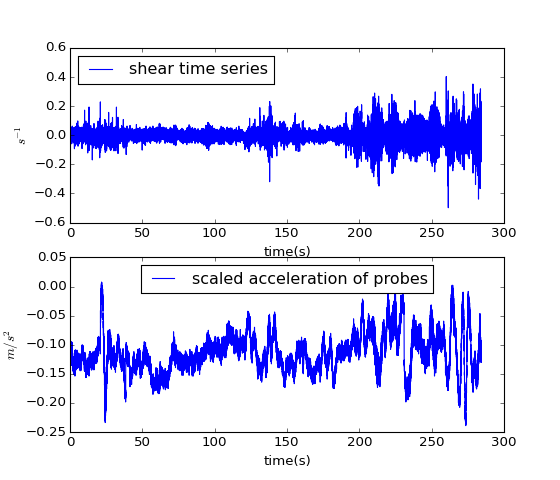

44434


In [44]:
fig= plt.figure(figsize=(7, 6))
ax= fig.add_subplot(2, 1, 1)
ax.plot(time, shear, label='shear time series')
ax.set_xlabel('time(s)')
ax.set_ylabel('$s^{-1}$')
ax.legend(loc=0)

ax=fig.add_subplot(2,1,2)
ax.plot(time, ac, label='scaled acceleration of probes')
ax.set_xlabel('time(s)')
ax.set_ylabel('$m/s^2$')
ax.legend(loc=0)
print len(shear)

The larger peaks on both do occur around the same time for the most part- around 25, 140 and rom 200-240 seconds


<div style='background:#F0F0F0'> **2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

<IPython.core.display.Javascript object>


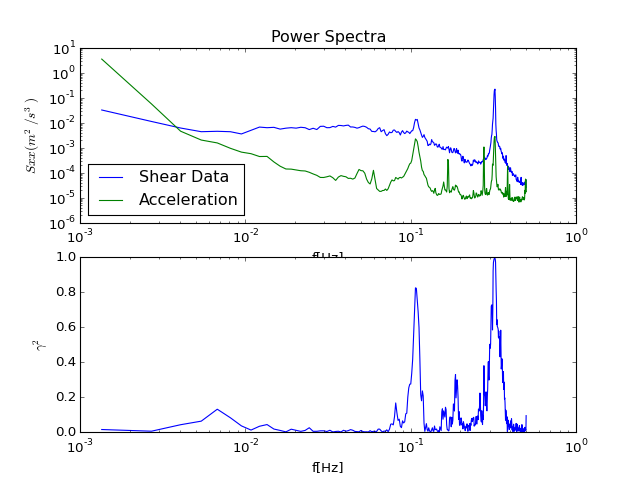

In [59]:
N=len(shear)

Gxxs,fs=mlab.psd(shear,NFFT=739, Fs=1, window=mlab.window_hanning, noverlap=369)
fig, ax=plt.subplots(2,1,figsize=(8, 6))

ax[0].loglog(fs,Gxxs, label='Shear Data')
ax[0].set_xlabel('freq(Hz)')
ax[0].set_ylabel('Sxx(1/s)')

Gxxa,fa=mlab.psd(ac,NFFT=739, Fs=1, window=mlab.window_hanning, noverlap=369)
ax[0].loglog(fa,Gxxa, label='Acceleration')
ax[0].set_xlabel('f[Hz]')
ax[0].set_ylabel('$Sxx(m^2/s^3)$')
ax[0].legend(loc=0)
ax[0].set_title('Power Spectra')

Csa,f=mlab.csd(ac,shear,NFFT=739, Fs=1, window=mlab.window_hanning, noverlap=369)
gam=abs(Csa)**2/Gxxa/Gxxs
ax[1].semilogx(f,gam, label='Coherence squared')
ax[1].set_xlabel('f[Hz]')
ax[1].set_ylabel('$\gamma^2$')

Power Spectra:  There certainly are peaks in the spectra at the same frequencies- at about 0.1, and 0.05

Coherence Squared: for the most part, the coherence is very low, about zero, but where the two similar peaks are, the $\gamma^2$ is quite high, as the time series are quite correlated. 


<div style='background:#F0F0F0'> **3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

<IPython.core.display.Javascript object>


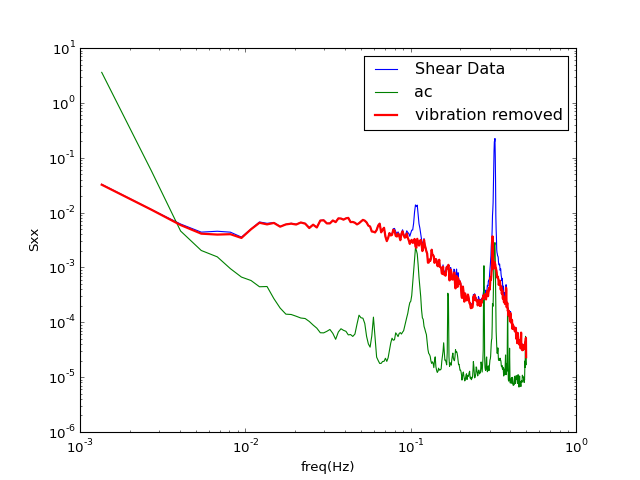

In [49]:
#remove part of shear that is coherent with ac.
newGxxs=Gxxs-abs(Csa)**2/Gxxa
fig, ax=plt.subplots(1,1)

ax.loglog(fs,Gxxs, label='Shear Data')
ax.loglog(fs,Gxxa,label='ac')
ax.loglog(fs,newGxxs, linewidth=2, label='vibration removed')
ax.legend(loc=0)
ax.set_xlabel('freq(Hz)')
ax.set_ylabel('Sxx')

The correction does appear to have worked, though there is still one large peak at $10^{-.5}$. Does this mean the correction is wrong, or just not good enough, or is there an actual peak after the contamination has been removed? 
Could check by taking the inverse fourier transform of this red line, then calculating the coherence squared between that and the original shear data. 


<div style='background:#F0F0F0'>**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

<IPython.core.display.Javascript object>


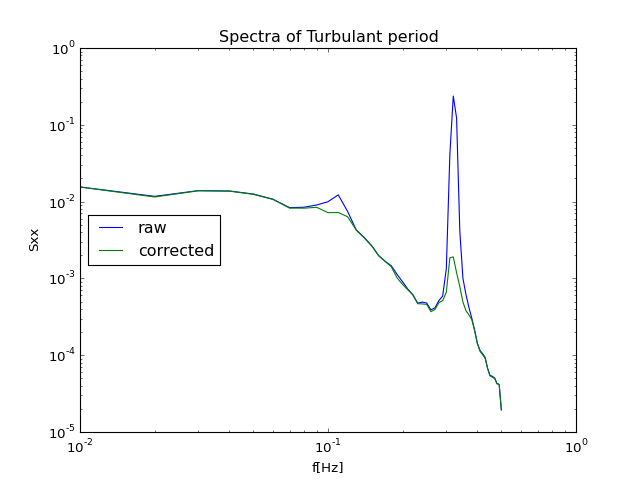

In [55]:
turbs=shear[31250:43750:]
turba=ac[31250:43750:]
N=len(turbs)
Gxxs,fs=mlab.psd(turbs,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)
Gxxa,fa=mlab.psd(turba,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)
Csa,f=mlab.csd(turba, turbs,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)

newGxxs=Gxxs-abs(Csa)**2/Gxxa

fig, ax=plt.subplots(1,1)

ax.loglog(fs,Gxxs, label='raw')
ax.loglog(fs,newGxxs, label='corrected')
ax.set_title('Spectra of Shear Turbulant Period')
ax.set_xlabel('f[Hz]')
ax.set_ylabel('Sxx')
ax.legend(loc=6)

The correction on the spectral estimate is certainly much improved, though the peaks are still somewhat evident. 

<IPython.core.display.Javascript object>


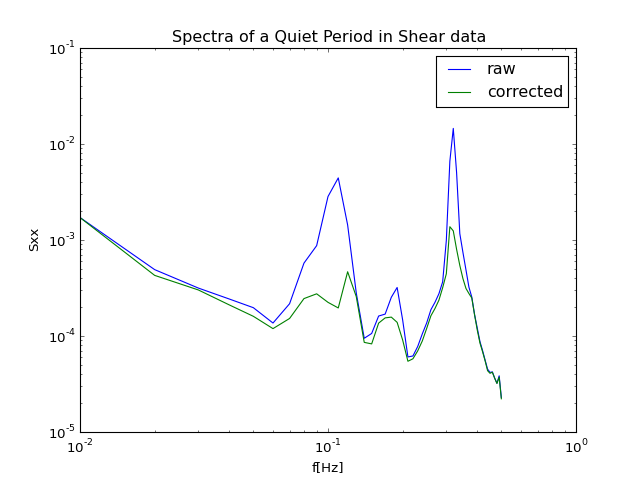

In [57]:
quiets=shear[7812:18750:]
quieta=ac[7812:18750:]
N=len(turbs)
Gxxs,fs=mlab.psd(quiets,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)
Gxxa,fa=mlab.psd(quieta,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)
Csa,f=mlab.csd(quieta,quiets,NFFT=100, Fs=1, window=mlab.window_hanning, noverlap=50)

newGxxs=Gxxs-abs(Csa)**2/Gxxa

fig, ax=plt.subplots(1,1)

ax.loglog(fs,Gxxs, label='raw')
ax.loglog(fs,newGxxs, label='corrected')
ax.set_title('Spectra of a Quiet Period in Shear data')
ax.set_xlabel('f[Hz]')
ax.set_ylabel('Sxx')
ax.legend(loc=0)

In both the quiet and turbulant plot, the correction does greatly reduce the peaks that are from the vibration. However,
the spectra for the turbulant section surprisingly had a better correctio, and the quiet perios data
still has fairly jagged and large peaks, even in the corrected spectra. 
The quiet data also has three peaks, whereas the trubulant data has only two. These latter peaks have correspoding 
frequencies to the outer peaks  in the quiet plot. 